# CS M148 Final Project

## Introduction
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. The total cost of stroke in the US was 103.5 billion dollars according to 2016 US dollar values. 68.5 billion dollars or 66% of total cost was accounted for by indirect cost from underemployment and premature death. Age groups 45-64 years accounted for the greatest stroke related direct cost.

## Challenge
This project is about being able to predict whether a patient is likely to get a stroke based on the input parameters available to us. Use features like gender, age, various medical conditions, and smoking status to build a model that helps you decide if a person is likely to experience a stroke event in the near future.

You will serve as data scientists hired by the UCLA hospital. You will be asked to develop a predictive model for this task and report out your findings to them. This project will include both a structured component, where much like Projects 1 and 2, you will be given a specific set of instructions to complete.

## Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart
disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

## Part 0: Setting Up

In [192]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42)

In [78]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [79]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [80]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [81]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Part 1: Basic Statistics

In [84]:
# Use label encoder for categorical variables with just 2 possible values.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["stroke"] = le.fit_transform(data["stroke"])
data["ever_married"] = le.fit_transform(data["ever_married"])
data["Residence_type"] = le.fit_transform(data["Residence_type"])

# We also don't need the id column.
data.drop(['id'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(2), int64(3), object(3)
memory usage: 399.3+ KB


Saving figure correlation_plot


age                  0.245257
hypertension         0.127904
heart_disease        0.134914
ever_married         0.108340
Residence_type       0.015458
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

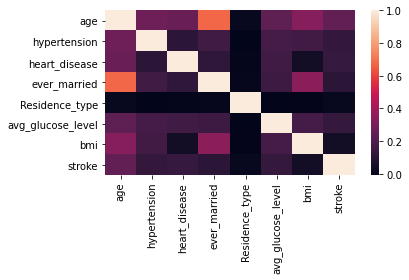

In [85]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
save_fig("correlation_plot")
corr_matrix["stroke"]

Saving figure scatter_matrix_plot


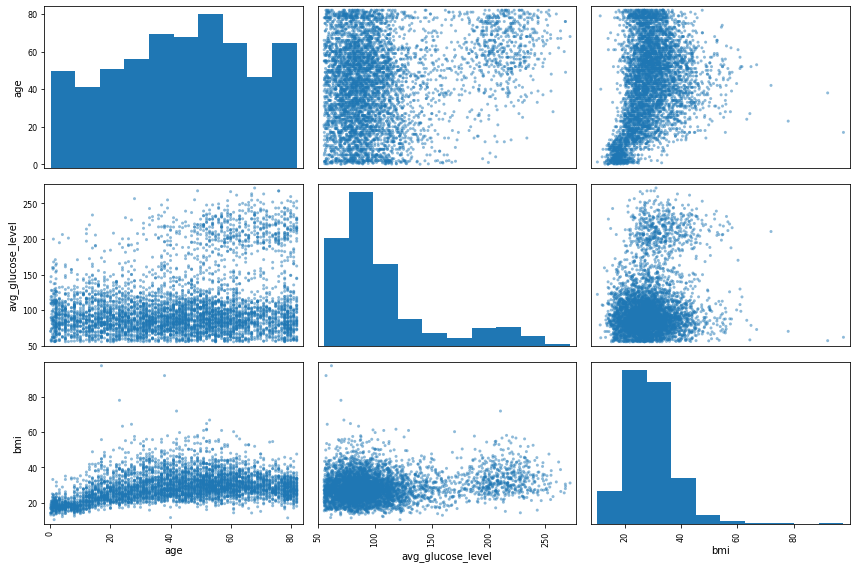

In [86]:
from pandas.plotting import scatter_matrix
attributes = ["age", "avg_glucose_level", "bmi"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure feature_histograms


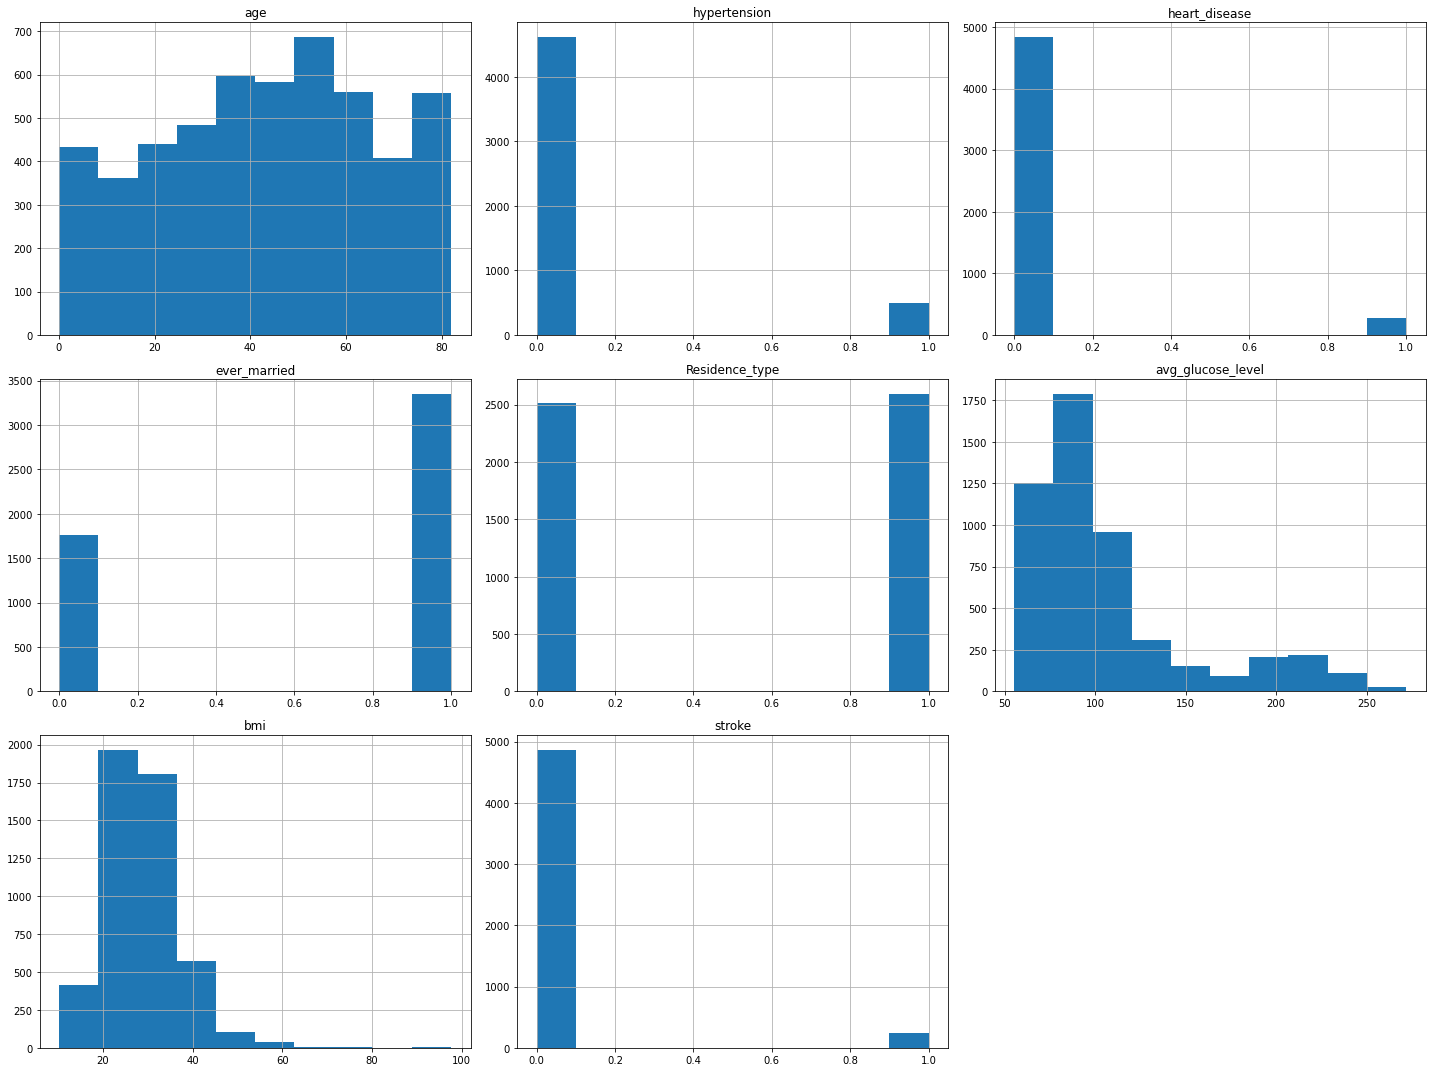

In [87]:
data.hist(bins=10, figsize=(20,15))
save_fig("feature_histograms")

From the above, we see that bmi, age, and avg_glucose_level are gradients while hypertension, heart_disease, ever_married, Residence_type, and stroke are binary. Since stroke is our response variable, we know that we are dealing with a classification problem here.

number of individuals with stroke: 249
number of individuals without stroke: 249
Saving figure stroke_histogram


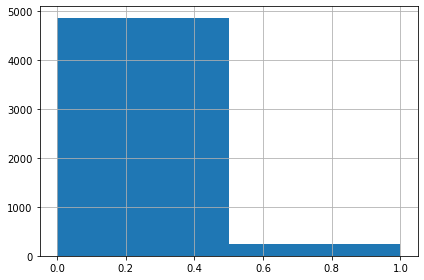

In [88]:
# Histogram of Healthy (0) vs. Sick (1)
data['stroke'].hist(bins=2)

num_stroke = 0
for i in data['stroke']:
    if i == 1:
        num_stroke += 1
print("number of individuals with stroke:", num_stroke)
print("number of individuals without stroke:", y.size - num_stroke)
save_fig("stroke_histogram")

In [89]:
from sklearn.utils import resample

df_majority = data[data.stroke == 0]
df_minority = data[data.stroke == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=num_stroke, random_state=42)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.stroke.value_counts()

1    249
0    249
Name: stroke, dtype: int64

In [90]:
# Our target variable is stroke (1 if the patient had a stroke and 0 otherwise).
y = df_downsampled["stroke"]

stroke = df_downsampled.copy(deep=True)
stroke.drop(["stroke"], axis=1, inplace=True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2435,Male,44.0,0,0,1,Private,1,80.75,30.9,never smoked
3600,Female,75.0,1,0,1,Self-employed,0,219.82,29.5,formerly smoked
2900,Female,56.0,0,0,1,Private,1,94.19,25.7,never smoked
2353,Female,5.0,0,0,0,children,1,122.25,16.7,Unknown
4060,Female,69.0,0,0,1,Self-employed,0,110.96,25.9,never smoked


## Part 2: Data Feature Extraction

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

numerical_features = ["age", "hypertension", "heart_disease", "ever_married", "Residence_type", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "work_type", "smoking_status"]
age_idx, bmi_idx, glucose_idx = 0, 6, 5

class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    stroke["age_over_bmi"] = stroke["age"] / stroke["bmi"]
    stroke["age_over_glucose"] = stroke["age"] / stroke["avg_glucose_level"]
    stroke["bmi_over_glucose"] = stroke["bmi"] / stroke["avg_glucose_level"]
    '''
    def __init__(self, add_augmented_features = True): 
        self.add_augmented_features = add_augmented_features
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        age_over_bmi = X[:, age_idx] / X[:, bmi_idx]
        age_over_glucose = X[:, age_idx] / X[:, glucose_idx]
        bmi_over_glucose = X[:, bmi_idx] / X[:, glucose_idx]
        if self.add_augmented_features:
            return np.c_[X, age_over_bmi, age_over_glucose, bmi_over_glucose]
        else:
            return np.c_[X]

# this will be are numirical pipeline
# 1. impute, 2. augment the feature set 3. normalize using StandardScaler()
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

stroke_prepared = full_pipeline.fit_transform(stroke)
stroke_prepared

array([[-0.5414508 , -0.46966822, -0.37011661, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.91248638,  2.12916259, -0.37011661, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.02136359, -0.46966822, -0.37011661, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.91248638, -0.46966822, -0.37011661, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72488158,  2.12916259, -0.37011661, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05318998, -0.46966822, -0.37011661, ...,  0.        ,
         0.        ,  0.        ]])

## Part 3: Logistic Regression

Before we move on, we must split our pipelined data into training set and testing set. Let's try an 80/20 split and print out each set's dimensions to make sure the data was split properly.

In [129]:
X_train, X_test, y_train, y_test = train_test_split(stroke_prepared, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 21) (398,)
(100, 21) (100,)


The dimensions match, so now we can move on and perform logistic regression!

Accuracy:    0.730000
Precision:   0.666667
Recall:      0.772727
F1 Score:    0.715789

Confusion Matrix:


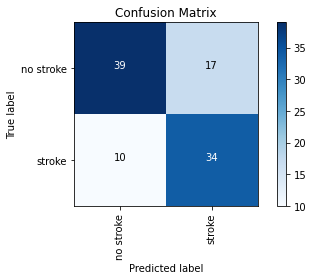

Saving figure logistic_regression_confusion_matrix


<Figure size 432x288 with 0 Axes>

In [130]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
predicted = log_reg.predict(X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(y_test, predicted, ["no stroke", "stroke"])
save_fig("logistic_regression_confusion_matrix")

## Part 4: Principal Component Analysis

In [134]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=6)
stroke_pca = pca.fit_transform(stroke_prepared)
print(stroke_pca.shape)
stroke_pca

(498, 6)


array([[ 0.6079601 ,  0.99067498,  0.31626082, -0.96023587, -0.33244747,
        -0.327078  ],
       [-1.44459372, -2.11776559,  0.73550275,  1.80465949,  0.55403451,
        -1.27913389],
       [-0.1832898 ,  0.32031429, -0.74170939, -0.68951798, -0.58875659,
        -0.61449717],
       ...,
       [-1.58521823,  1.45523429, -0.53101436,  0.71805408, -0.79474391,
         0.39927266],
       [-1.56306343,  0.68778252, -0.06832689,  1.70217153,  1.1557491 ,
        -0.64714356],
       [-2.20312003,  0.59411349, -2.34259369,  1.15352128, -1.04901341,
         0.30713573]])

In [135]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(stroke_pca, y, test_size=0.2)
print(new_X_train.shape, new_y_train.shape)
print(new_X_test.shape, new_y_test.shape)

(398, 6) (398,)
(100, 6) (100,)


Accuracy:    0.800000
Precision:   0.828125
Recall:      0.854839
F1 Score:    0.841270

Confusion Matrix:


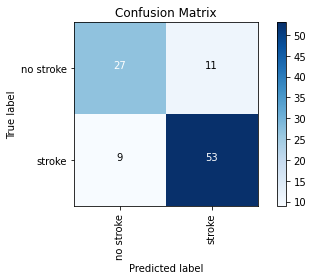

Saving figure pca_logistic_regression_confusion_matrix


<Figure size 432x288 with 0 Axes>

In [136]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["no stroke", "stroke"])
save_fig("pca_logistic_regression_confusion_matrix")

## Part 5: Ensemble Method

Before we jump into implementing an ensemble method, let's see what a decision tree looks like on our data.

1.0
0.62
Accuracy:    0.620000
Precision:   0.750000
Recall:      0.580645
F1 Score:    0.654545

Confusion Matrix:


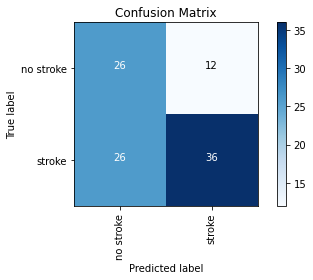

Saving figure single_decision_tree


<Figure size 432x288 with 0 Axes>

In [322]:
dt = DecisionTreeClassifier()
dt.fit(new_X_train, new_y_train)
print(dt.score(new_X_train, new_y_train))
print(dt.score(new_X_test, new_y_test))

predicted = dt.predict(new_X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["no stroke", "stroke"])
save_fig("single_decision_tree")

As we can see above, a single decision tree overfits our training data, and it performs poorly on our testing data with only 62% accuracy. Let's see if we can do better by trying out different ensemble methods. The first one we'll try is Random Forest, which is an ensemble of decision trees.

0.9899497487437185
0.69
Accuracy:    0.690000
Precision:   0.816327
Recall:      0.645161
F1 Score:    0.720721

Confusion Matrix:


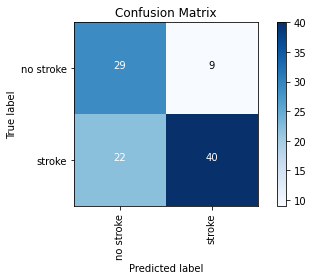

Saving figure random_forest


<Figure size 432x288 with 0 Axes>

In [323]:
rf = RandomForestClassifier(n_estimators=10) # Let's try 10 decision trees.
rf.fit(new_X_train, new_y_train)
print(rf.score(new_X_train, new_y_train))
print(rf.score(new_X_test, new_y_test))

predicted = rf.predict(new_X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["no stroke", "stroke"])
save_fig("random_forest")

By using a random forest with 10 decision trees, we are able to reduce overfitting and improve our accuracy on the test set by about 0.1. Now let's move on to bagging, which uses multiple models of the same learning algorithm trained with subsets of data randomly picked from the training dataset.

0.8592964824120602
0.77
Accuracy:    0.770000
Precision:   0.809524
Recall:      0.822581
F1 Score:    0.816000

Confusion Matrix:


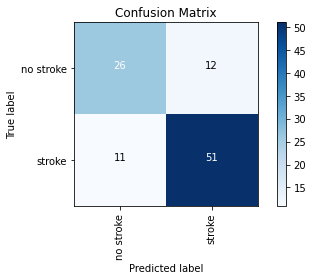

Saving figure bagging


<Figure size 432x288 with 0 Axes>

In [324]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.3, n_estimators=20)
bg.fit(new_X_train, new_y_train)
print(bg.score(new_X_train, new_y_train))
print(bg.score(new_X_test, new_y_test))

predicted = bg.predict(new_X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["no stroke", "stroke"])
save_fig("bagging")

Through bagging, we were able to limit overfitting even more and achieve a higher accuracy score than random forest. We used 20 decision trees, and each bag could contain a maximum of 30% of the training dataset.